# Clustering data

To group the data by their characteristics, we will divide the data analysis process into three stages:


In [2]:
#-*- coding:utf-8 -*-
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
from pandas.plotting import parallel_coordinates

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

%matplotlib inline

#  1 Data cleaning and analysis

In [3]:
data = pd.read_csv('991f8fa088a1b072.csv')
data.head(n=5)

,FS_PERM_SEC_ID,ENTITY_NAME,FF_MKT_VAL_CURR,FF_CURR_PS_CF,FF_PBK_SECS_CURR,FF_PE_SECS_CURR,DATE,FF_SALES,FF_NET_INCOME,FF_ASSETS,FF_DFD_TAX_ITC,FF_DEBT,FF_EPS_REPORTED,FF_EQ_TOT,FF_EPS_BASIC,FF_COGS,FF_CAPEX
0,HKS27K-S-US,CHOICEONE FINANCIAL SERVICES INC,94.1031,2.589208,1.30403,15.2072,20171231,28.944,6.168,646.544,NaN,27.416,1.6952,76.550,1.7048,NaN,1.656
1,T1N9J9-S-US,1ST SOURCE CORP,1458.4500,4.901868,1.97015,19.2363,20171231,309.696,67.531,5915.351,2.670,343.419,2.6000,718.537,2.6000,NaN,51.447
2,WHQNFK-S-US,AAR CORP,1612.2800,3.601036,1.75654,107.0590,20170531,1767.600,56.000,1552.500,37.200,157.300,1.6400,914.200,1.6519,1493.700,33.600
3,RK3780-S-US,AARONS INC,3182.1000,32.947366,1.82330,11.2745,20171231,3383.708,292.536,2692.264,211.003,368.798,4.0600,1728.004,4.1300,1790.137,57.973
4,Q1KJQ2-S-US,ABBOTT LABORATORIES,114361.0000,2.741859,3.64217,128.9640,20171231,27390.000,468.000,76250.000,2006.000,27924.000,0.2700,31098.000,0.2690,14266.000,1135.000


In [4]:
data_frame = data.drop(['FS_PERM_SEC_ID', 'ENTITY_NAME'], axis=1)
data_frame.fillna(data_frame.mean(), inplace=True) 
data_frame.describe()

,FF_MKT_VAL_CURR,FF_CURR_PS_CF,FF_PBK_SECS_CURR,FF_PE_SECS_CURR,DATE,FF_SALES,FF_NET_INCOME,FF_ASSETS,FF_DFD_TAX_ITC,FF_DEBT,FF_EPS_REPORTED,FF_EQ_TOT,FF_EPS_BASIC,FF_COGS,FF_CAPEX
count,9.745000e+03,9.745000e+03,9.745000e+03,9745.000000,9.745000e+03,9.745000e+03,9.745000e+03,9.745000e+03,9.745000e+03,9.745000e+03,9745.000000,9.745000e+03,9745.000000,9.745000e+03,9.745000e+03
mean,1.672987e+04,1.261376e+06,5.027819e+02,58.838229,2.017105e+07,1.997807e+04,8.954330e+02,3.940094e+04,3.254570e+02,1.478458e+04,2.100295,9.389728e+03,1.836349,1.802292e+04,2.889765e+03
std,4.695093e+05,5.121476e+07,3.070891e+04,291.901776,3.210644e+02,7.931633e+05,3.188754e+04,1.275172e+06,2.550546e+04,5.366219e+05,289.959739,3.798239e+05,290.945383,6.670255e+05,1.402772e+05
min,7.100000e-05,-1.093838e+06,4.635830e-04,0.005000,2.017013e+07,-6.176800e+02,-1.248308e+05,-3.000000e-06,-1.691973e+06,-1.258918e+00,-19390.000000,-9.714241e+06,-19390.000000,-1.872457e+01,0.000000e+00
25%,1.614650e+01,-1.808442e-02,1.458170e+00,24.271400,2.017093e+07,4.901000e-03,-3.719562e+00,4.983000e+00,3.170000e-01,0.000000e+00,-0.100000,8.373640e-01,-0.100000,1.150000e-01,1.300000e-02
50%,2.321840e+02,9.259040e-02,3.702320e+00,58.838229,2.017123e+07,3.561400e+01,-5.219400e-02,1.488496e+02,3.254570e+02,8.385808e+00,0.000000,4.867742e+01,-0.000600,5.373700e+01,1.516881e+00
75%,3.642120e+03,2.633259e+00,5.027819e+02,58.838229,2.017123e+07,6.928690e+02,3.352600e+01,1.750430e+03,3.254570e+02,4.258550e+02,1.190000,5.596910e+02,1.300000,1.603000e+03,3.750000e+01
max,3.527330e+07,3.679400e+09,3.023080e+06,25625.000000,2.017123e+07,5.644280e+07,2.200256e+06,7.919277e+07,1.450752e+06,3.690129e+07,18555.000000,1.973235e+07,19070.000000,4.850608e+07,1.123104e+07


### 1.1 Visualization of the relationship between multiple variables-Seaborn

From the correlation diagram we can see that the variables [FF_CURR_PS_CF, FF_PBK_SECS_CURR, FF_PE_SECS_CURR, DATE] have no relationship with the other variables.

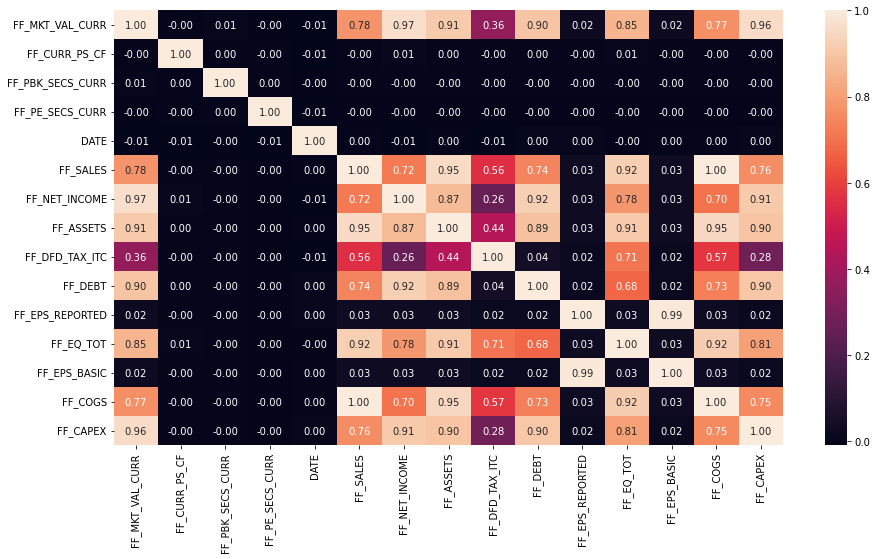

In [5]:
plt.figure(figsize = (15, 8))
correlation=sns.heatmap(data_frame.corr(), annot = True,fmt=".2f")
plt.savefig('assets/correlation.png')

### 1.2  Linear regression

We can see that the data has many values with a fairly small variance and then many extreme outliers.

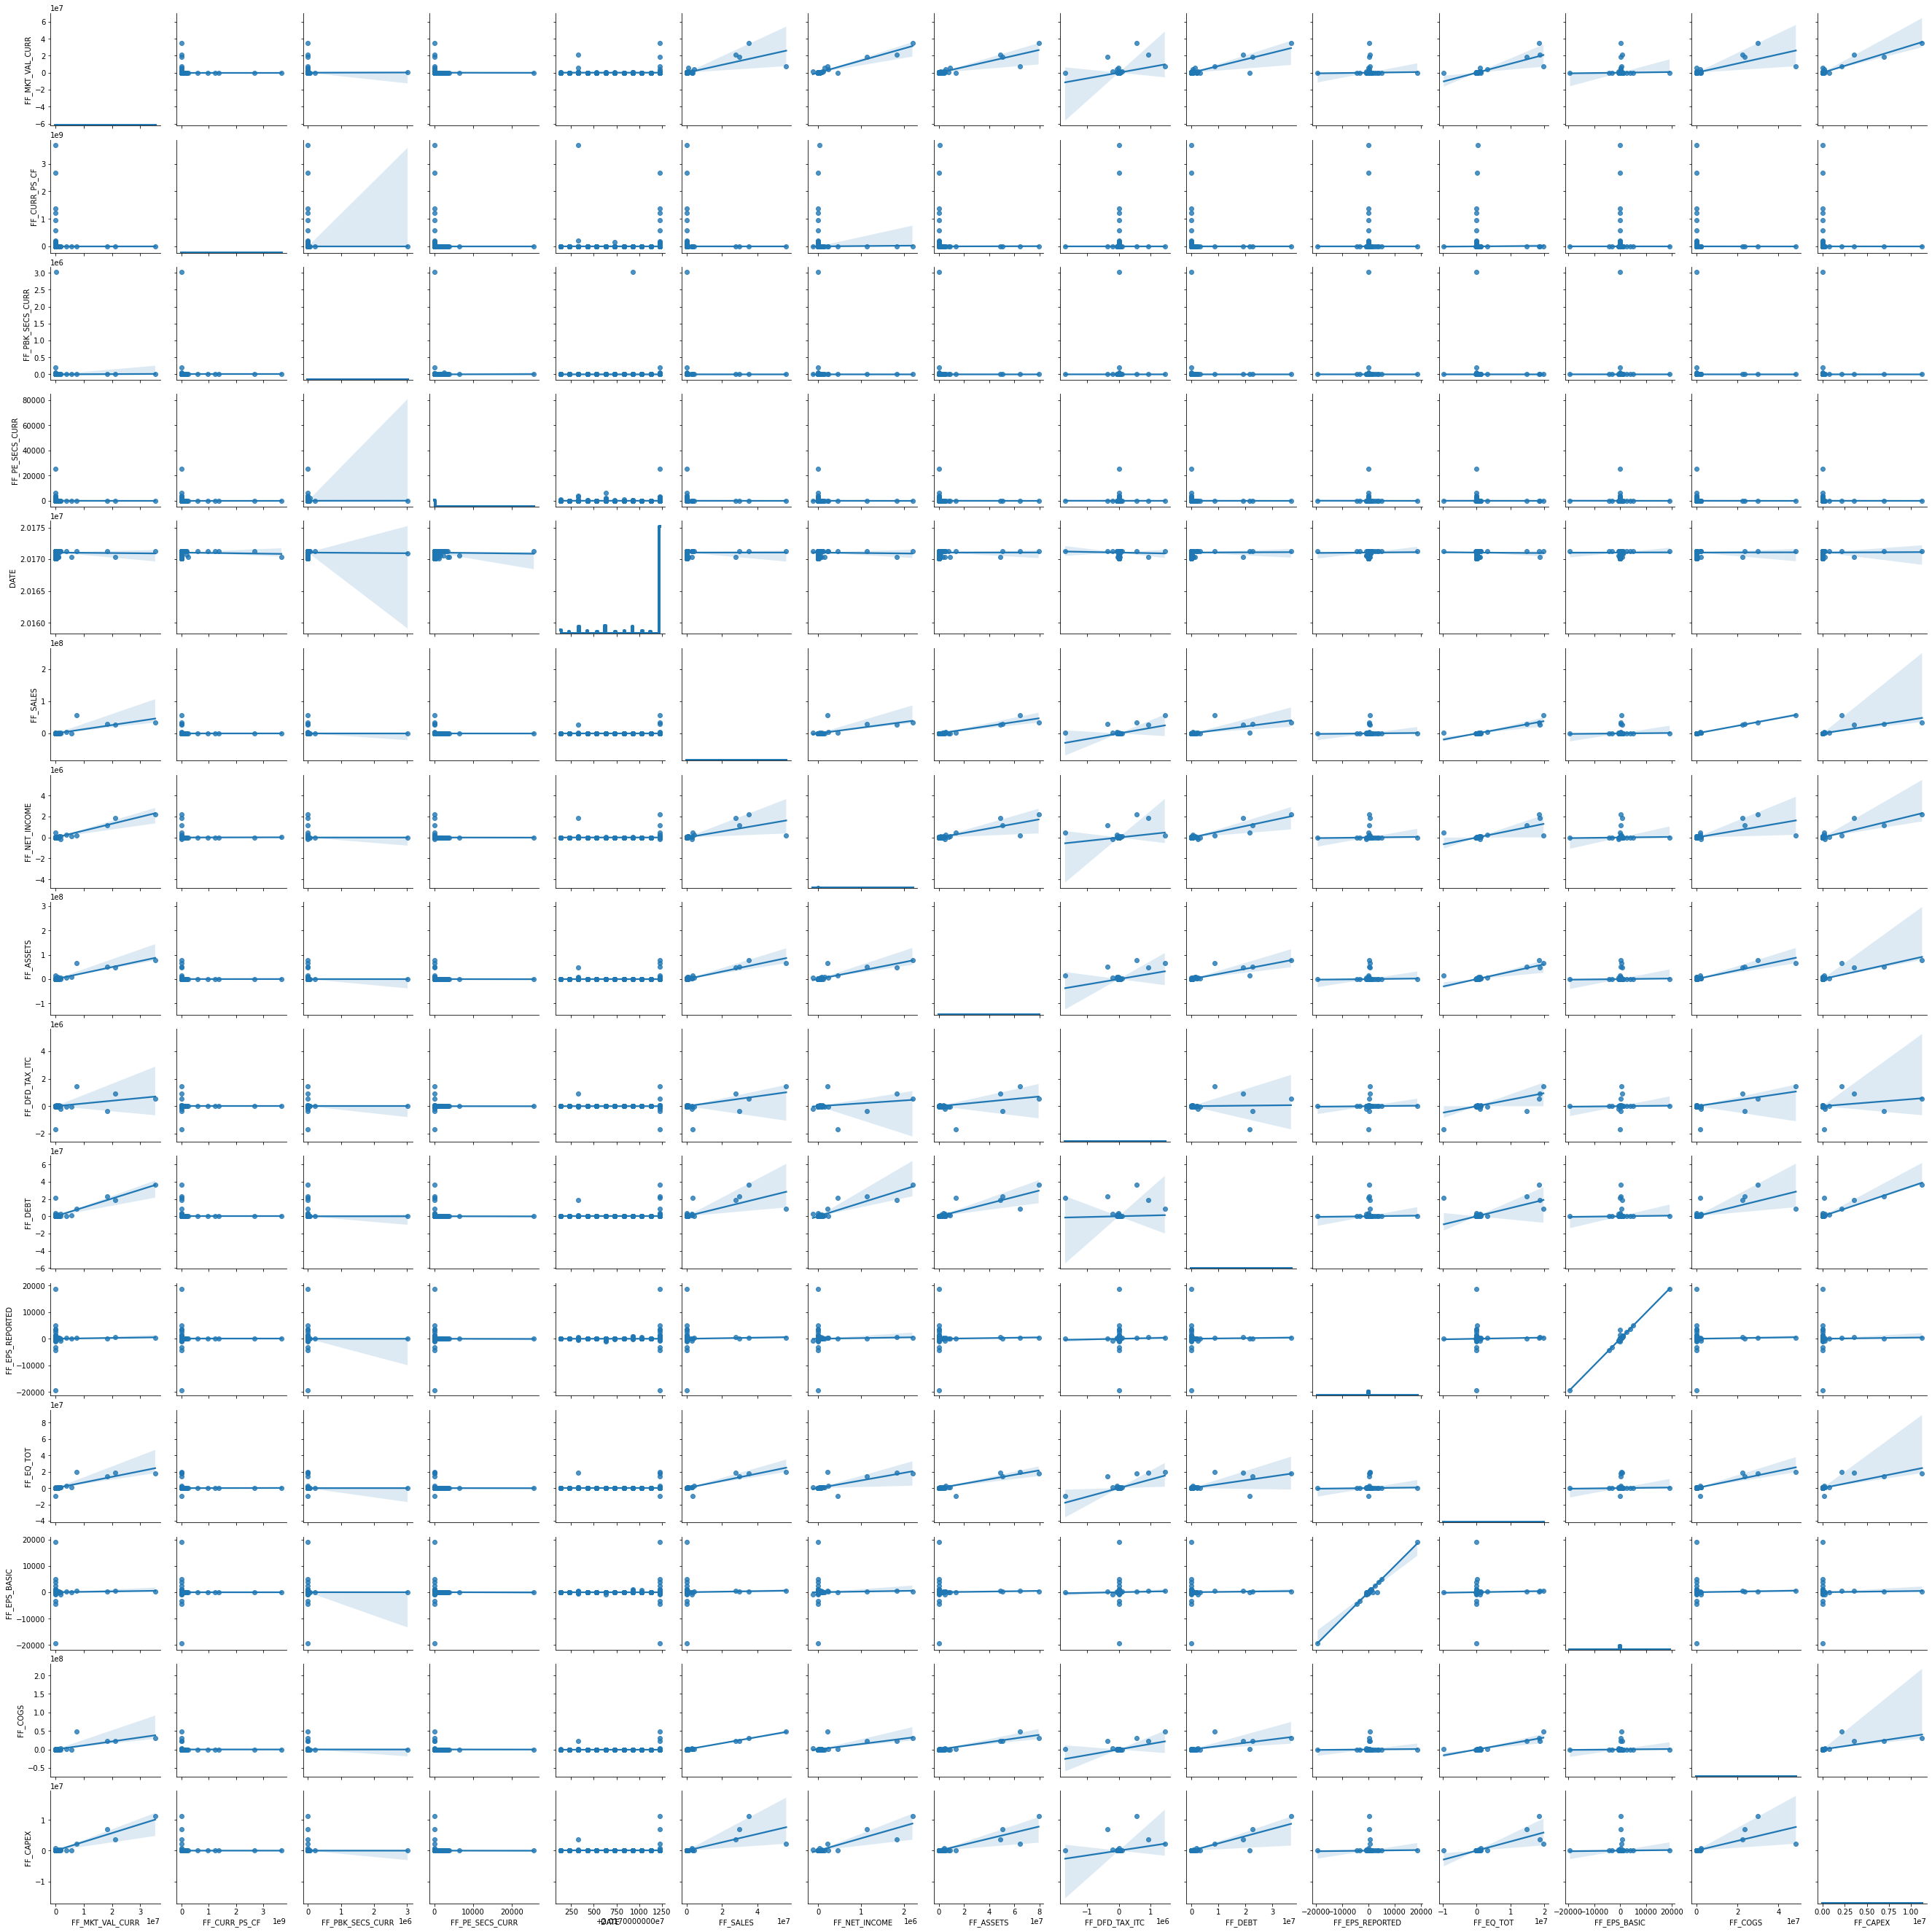

In [6]:
plot = sns.pairplot(
        data_frame,
        kind='reg',
        diag_kws=dict(
            bins='sqrt',
            element='step',
            fill=False,
            stat="density",
            linewidth=4.0
        )
    )
plt.savefig('assets/regression.png')

The information of the rest of the attributes is related, as a consequence there is a redundancy (noise), which can reduce the operation of our model so we reduce the dimensionality.

To reduce that 11-dimensional data into 2 dimensions PCA will be used, to better plot and understand the data.

# 2 Data processing

### 2.1 PCA for Data Visualization



For the optimal performance of many machine learning algorithms we use StandardScaler to  standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)

In [7]:
optimal_data = StandardScaler().fit_transform(data_frame)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(optimal_data)
principal_df = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])
principal_df.head(n=10)

,principal component 1,principal component 2
0,-0.066960,-0.002524
1,-0.064969,-0.006637
2,-0.072678,0.005490
3,-0.066619,-0.014076
4,0.115971,0.009320
5,-0.063999,-0.003520
6,-0.063296,0.009915
7,-0.068520,0.007562
8,-0.075921,0.005372
9,-0.058976,-0.002818


In [8]:
principal_df.describe()

,principal component 1,principal component 2
count,9.745000e+03,9.745000e+03
mean,1.120192e-17,-6.227915e-18
std,2.680466e+00,1.410592e+00
min,-1.957720e+00,-9.156090e+01
25%,-7.709786e-02,1.490797e-03
50%,-7.537224e-02,6.371248e-03
75%,-6.588845e-02,1.086397e-02
max,1.748571e+02,9.438617e+01


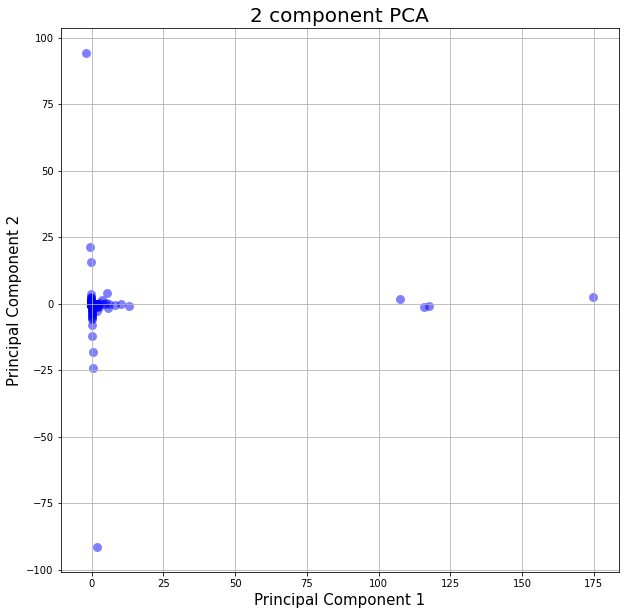

In [9]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
ax.scatter(principal_df['principal component 1'], principal_df['principal component 2'],
           color='b', **plot_kwds)
ax.grid()
plt.savefig('assets/PCA.png')

### 2.2 Remove Outliers (Interquartile Range Method)

In [10]:
df=principal_df
variables=df.columns
for variable in variables:
    percentiles = df[variable].quantile([0.1,0.9]).values
    df[variable][df[variable] <= percentiles[0]] = percentiles[0]
    df[variable][df[variable] >= percentiles[1]] = percentiles[1]



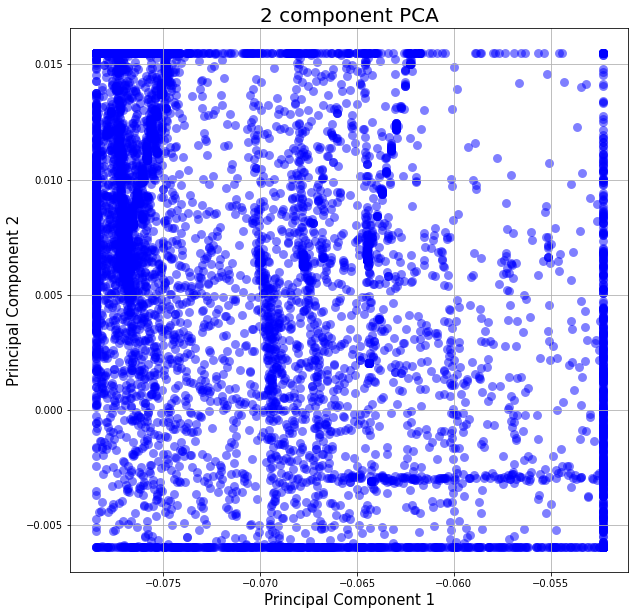

In [11]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
ax.scatter(df['principal component 1'], df['principal component 2'],
           color='b', **plot_kwds)
ax.grid()

plt.savefig('assets/filtered_data.png')




By using the attribute explained_variance_ratio_, we can see that the first principal component contains 47.89% of the variance and the second principal component contains 13.26% of the variance. Together, the two components contain 61.15% of the information.

In [12]:
sum(pca.explained_variance_ratio_)

0.6115818775910853

Vizualizing the correlation matrix for the principal components

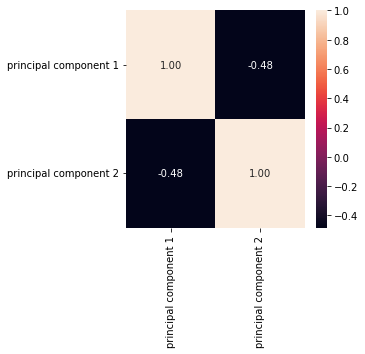

In [13]:
plt.figure(figsize = (4, 4))
correlation=sns.heatmap(df.corr(), annot = True,fmt=".2f")
plt.savefig('assets/pca-correlation.png')

# 3 Clustering algorithms

###  3.1 Getting set up

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import hdbscan
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}




Utility function to do the clustering and plot the results 

In [15]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    ax.set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    ax.scatter(data['principal component 1'], data['principal component 2'],
           color=colors, **plot_kwds)
    ax.grid()
    plt.axis('off')
    
    

### 3.2 Testing Clustering Algorithms

#### Spectral Clustering

Spectral clustering performed very good on the long thin clusters, but still ended up cutting some of them strangely and dumping parts of them in with other clusters. 

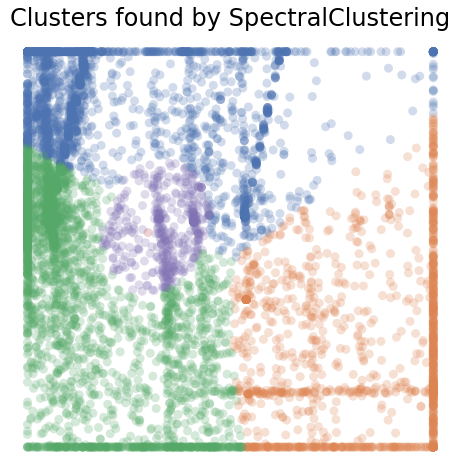

In [16]:
plot_clusters(df, cluster.SpectralClustering, (), {'n_clusters':5})
plt.savefig('assets/spectral.png')

#### K-Means

We see some interesting results. First, the assumption of perfectly globular clusters means that the natural clusters have been spliced and clumped into various more globular shapes. Worse, the noise points get lumped into clusters as well.

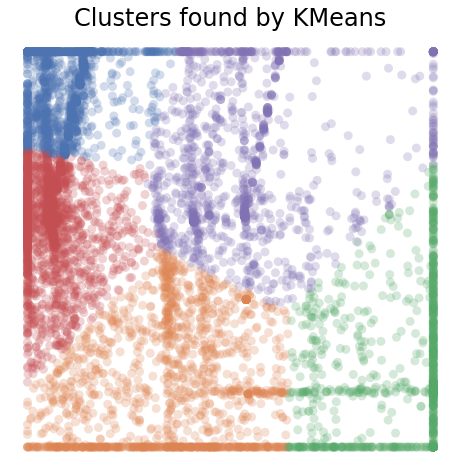

In [17]:
plot_clusters(df, cluster.KMeans, (), {'n_clusters':5})
plt.savefig('assets/k_means.png')

#### DBSCAN

Finally doing a decent job, but there's still plenty of room for improvement.

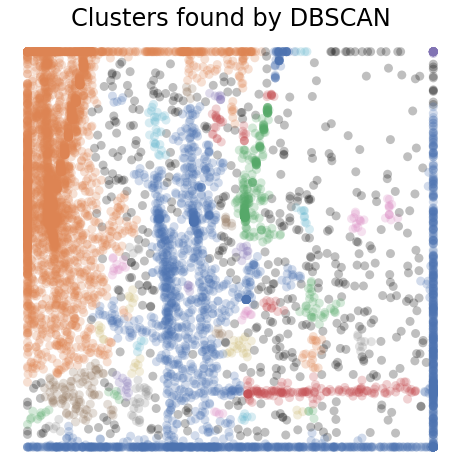

In [18]:
plot_clusters(df, cluster.DBSCAN, (), {'eps':0.00045})
plt.savefig('assets/dbscan.png')

#### HDBSCAN


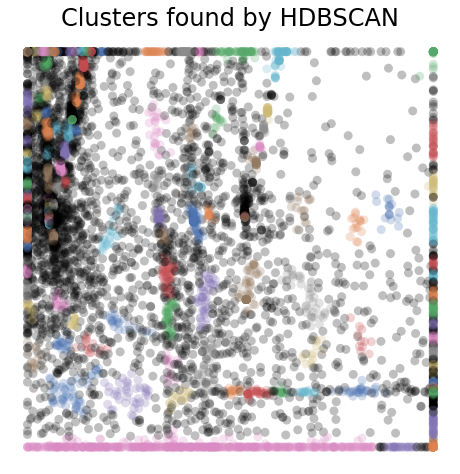

In [19]:
plot_clusters(df, hdbscan.HDBSCAN, (), {'min_cluster_size':10})
plt.savefig('assets/hdbscan.png')

#### Agglomerative Clustering


Next, we need to know the clusters that we want our data to be split to. We will again use the scipy library to create the dendrograms for our dataset. 


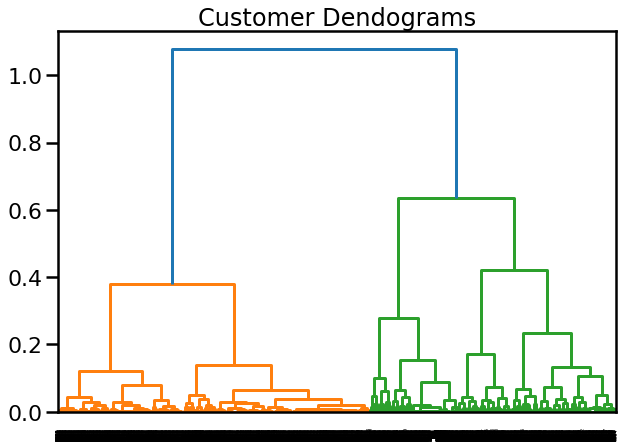

In [20]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.savefig('assets/dendrogram.png')

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 5 clusters.

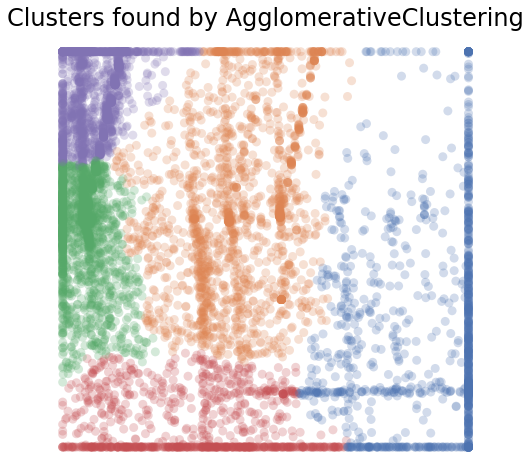

In [22]:
plot_clusters(df, cluster.AgglomerativeClustering, (), {'n_clusters':5, 'affinity':'euclidean', 'linkage':'ward'})
plt.savefig('assets/agglomerative.png')

Similar to the spectral clustering we have handled the long thin clusters much better than K-Means.

The end result is probably the best clustering we've seen so far, but given the mis-clustering and noise issues we are still not going to get as good an intuition for the data as we might reasonably hope for.

### 3.3 Data grouping

Creation of functions for the analysis of the different algorithms in a simpler way

In [23]:
def grouping(data, algorithm, args, kwds):
    labels = algorithm(*args, **kwds).fit_predict(data)
    df = data
    df['cluster'] = labels
    groups_id=np.unique(labels)
    
    print('Number of data in each group ')
    for group_id in groups_id:
        print("Cluster {} = {} ".format(group_id, sum(labels==group_id)))
    
    return labels

def plot_groups(data, labels):
    fig, axs = plt.subplots(5,3, figsize = (15,15))
    variables=list(data.columns.values)
    i,j=0,0
    for variable in variables:
        if j > 2:
            j=0
            i=i+1  
        
        sns.barplot(x=labels, y=data[variable], ax = axs[i,j])
        j=j+1  
    plt.tight_layout()
    


It is convenient to graph the algorithms with the best clustering response to perform a more detailed visual analysis.

#### K-Means

In [24]:
k_means=grouping(df, cluster.KMeans, (), {'n_clusters':5})

Number of data in each group 
Cluster 0 = 3401 
Cluster 1 = 1480 
Cluster 2 = 1366 
Cluster 3 = 1312 
Cluster 4 = 2186 


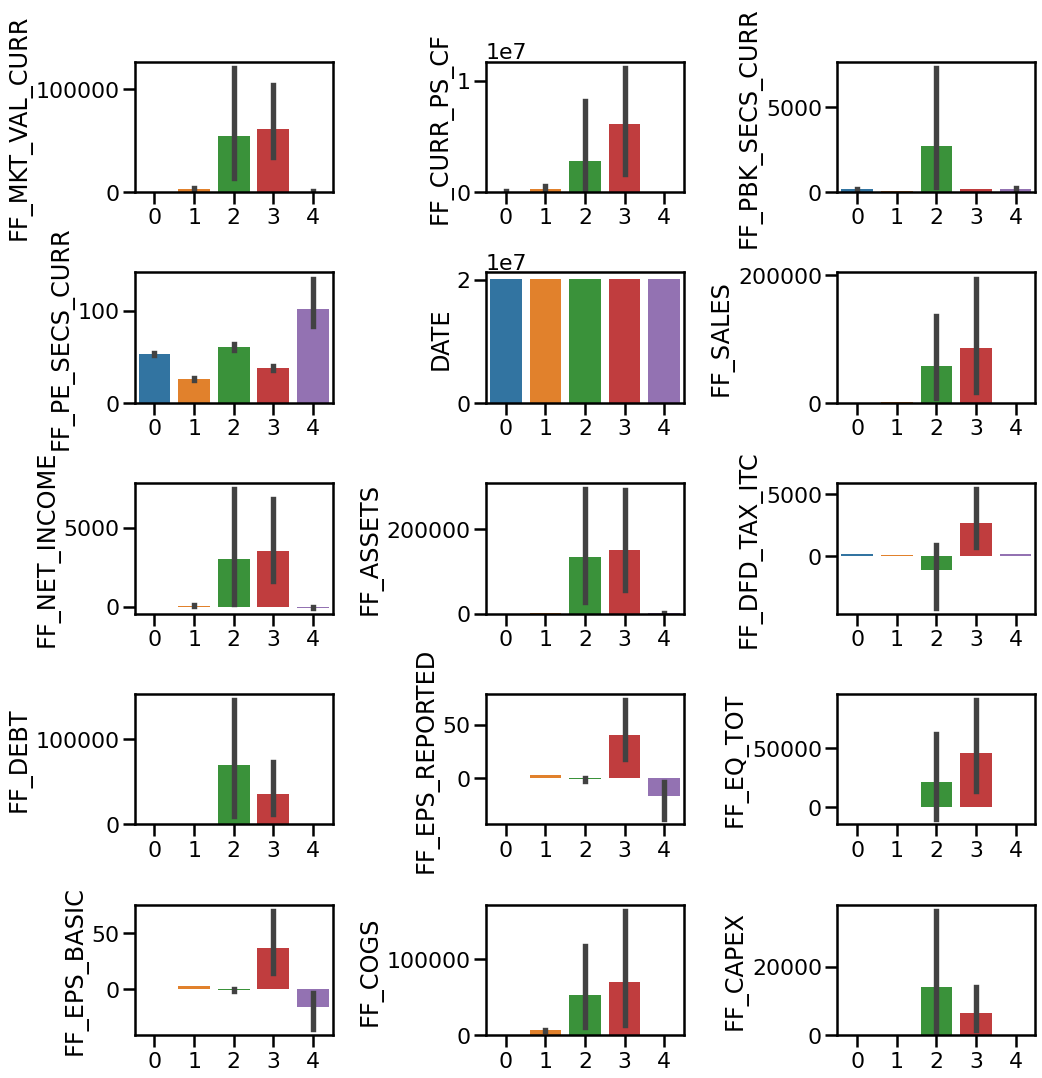

In [25]:
plot_groups(data_frame,k_means)
plt.savefig('assets/k_menas_groups.png')

#### Agglomerative Clustering

In [26]:
agglomerative=grouping(df, cluster.AgglomerativeClustering, (), 
              {'n_clusters':5, 'affinity':'euclidean', 'linkage':'ward'})

Number of data in each group 
Cluster 0 = 1366 
Cluster 1 = 1480 
Cluster 2 = 2186 
Cluster 3 = 3401 
Cluster 4 = 1312 


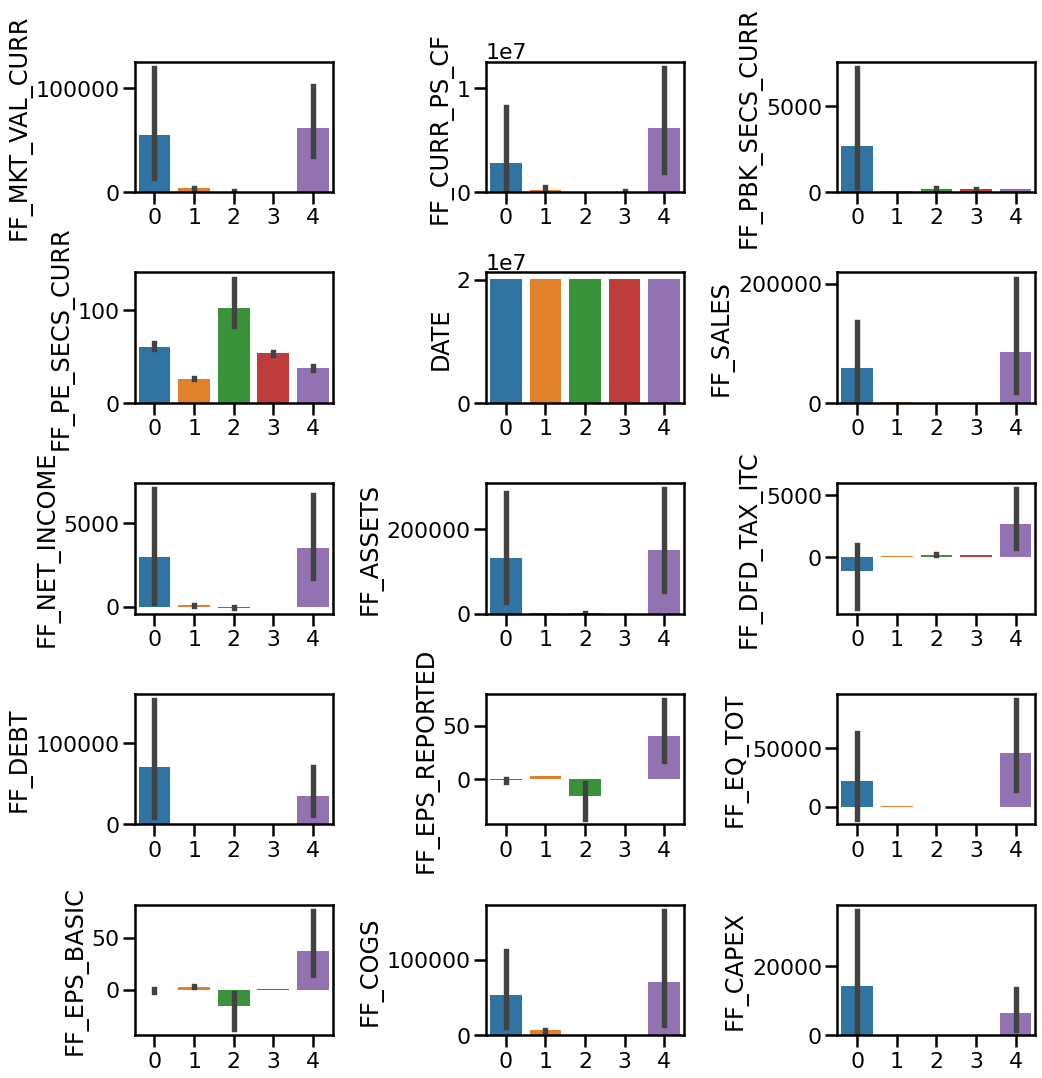

In [27]:
plot_groups(data_frame,agglomerative)
plt.savefig('assets/agglomerative_groups.png')

## Conclusion

#### Is there a class of algorithms you can use to group these companies?

Knowing how different clustering algorithms perform on different data types is essential for deciding if clustering makes sense for your data.

We have introduced some of the data pooling algorithms (unsupervised learning) to compare the results obtained and try to have a successful exit.
But given the problems of incorrect grouping and noise, we still haven't got as good an intuition for the data as we might reasonably hope for.

#### What are the shared factors amongst these groups?

As with any data science task, you can’t just throw an algorithm at the data. You must understand your data and understand the original intentions of the algorithm. Even if your data is not well suited for clustering.

From the dimensionality reduction we have a positive correlation and we form a dense side group, we also find many outliers.

After running several clustering algorithms on this data, no distinct or meaningful groups were formed and it was determined that these attributes were not well suited for clustering! However, by simply visualizing the data early on in the analysis, this conclusion could have been made sooner.

For clustering analysis, we need to consider what kind of validation and what metric makes the most sense for this data.

